<a href="https://colab.research.google.com/github/AntonioSlip/Engenharia_de_Dados/blob/main/Atividade_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Primeira Análise nos dados

In [260]:
#Importando a biblioteca pandas com apelido pd
import pandas as pd

In [261]:
#Lendo o banco de dados cancer_de_mama.csv dentro do drive, guardando em uma variável cancer_mama e imprimindo em seguida o dataframe
cancer_mama = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Engenharia_de_Dados/cancer_de_mama.csv")
cancer_mama

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [262]:
#Exibindo informações do dataframe
cancer_mama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [263]:
#Exibindo informações de estatística do dataframe.
cancer_mama.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


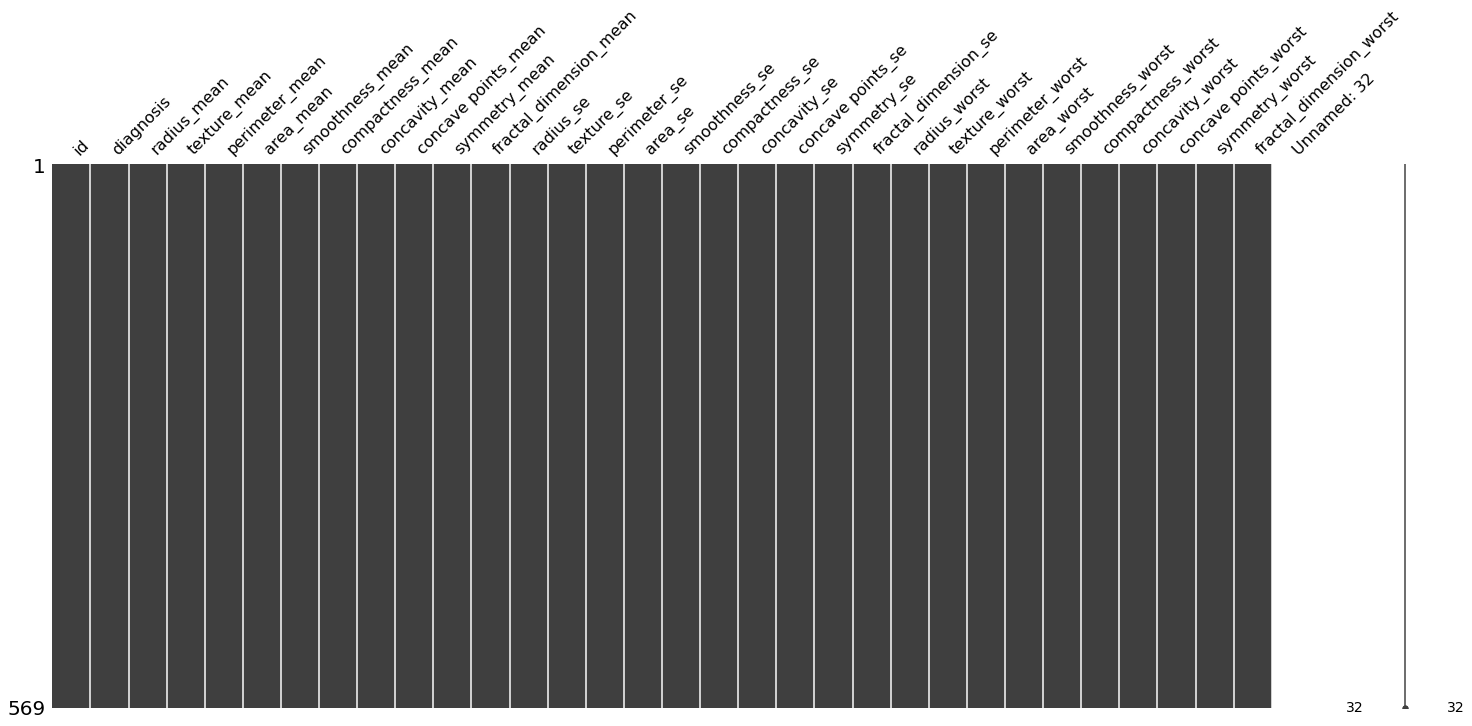

In [264]:
#Visualizando os dados faltantes ou missing value empregando a função matrix do pacote python missingno e biblioteca matplotlib.pyplot
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(cancer_mama)
plt.show()

In [265]:
#Alterando os dados da coluna diagnosis atráves do metodo loc(), onde for M será Maligno e B será Benigno
cancer_mama.loc[cancer_mama["diagnosis"] == "M", "diagnosis"] = "Maligno"
cancer_mama.loc[cancer_mama["diagnosis"] == "B", "diagnosis"] = "Benigno"
cancer_mama

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,Maligno,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,Maligno,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,Maligno,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,Maligno,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,Maligno,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,Maligno,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,Maligno,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,Maligno,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,Maligno,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


#Análise exploratória dos dados

In [194]:
#Instalando o Pandas Profiling
!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/ydataai/pandas-profiling/archive/master.zip


In [266]:
#Importando o metodo ProfileReport da biblioteca pandas_profiling
from pandas_profiling import ProfileReport

In [267]:
#Usando o Profiling no jupyter notebook
#Gerando um relatório profile report para o dataframe cancer_mama e guardando em uma variável profile
profile = ProfileReport(cancer_mama, title = "Pandas Profiling Report", html={"style":{"full_width":True}})

In [161]:
#Gerando um relátorio html e baixando em um local especifico
profile.to_file("/content/drive/MyDrive/Colab Notebooks/Engenharia_de_Dados/relatório_cancer_mama.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#Correlação

In [268]:
#Mostrando a correlação entre os dados. 
#Se - 1, há uma correlação inversamente proporcional. Se 0, não a correlação. Se 1, há correlação diretamente proporcional.
cancer_mama.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN


In [269]:
#Importando bibliotecas seaborn, matplotlib.pyplot e numpy
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

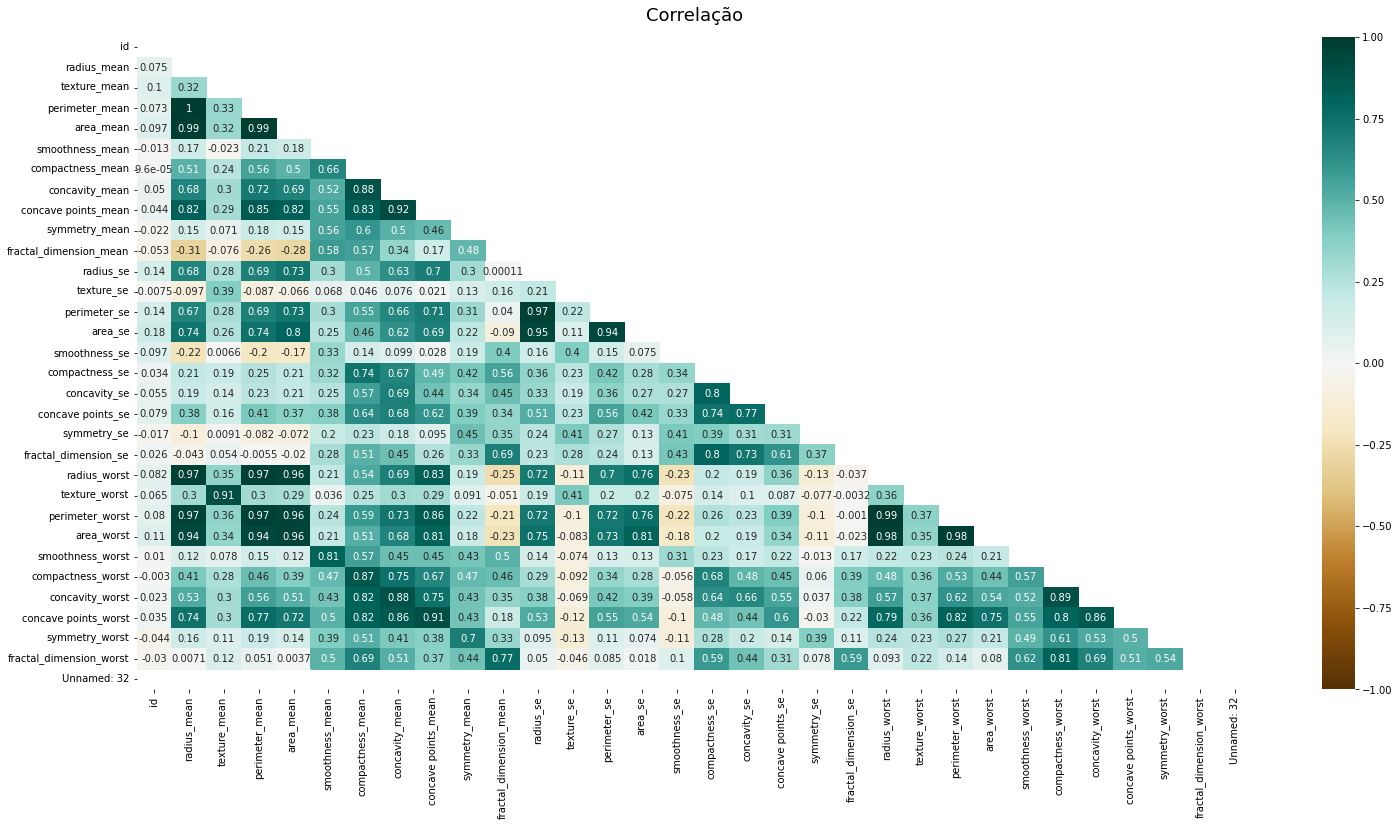

In [270]:
#Plotando um mapa de calor relacionado a correlação 
plt.figure(figsize=(25, 12))
mask = np.triu(np.ones_like(cancer_mama.corr(), dtype=bool))
heatmap = sns.heatmap(cancer_mama.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação', fontdict={'fontsize':18}, pad=16);

#Dividindo os dados em treino e teste

In [271]:
#Importando o metodo train_test_split da biblioteca sklearn
from sklearn.model_selection import train_test_split

In [272]:
#Pegando duas variaveis: x e y e dividindo os dados em treino e teste, onde X será a tabela menos as colunas 'diagnosis','Unnamed: 32','id' 
# e Y será só a coluna de classificação "diagnosis"
X = cancer_mama.drop(['diagnosis','Unnamed: 32','id'],axis=1)
Y = cancer_mama["diagnosis"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 54)

In [273]:
#Mostrando quantidade de linhas e colunas de X_train, X_test,Y_train e Y_test.shape
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((398, 30), (171, 30), (398,), (171,))

#Usando o KNN

In [274]:
#Importando o KNeighborClassifier da biblioteca sklearn.
from sklearn.neighbors import KNeighborsClassifier

In [275]:
#Criando uma função para mostrar o maior score e escolher o melhor k
score = []
inicio_k = 1
fim_k = 31
incremento = 1

def valores_k(inicio_k,fim_k,incremento):
  for i in range(inicio_k,fim_k,incremento): 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    score.append(knn.score(X_test, Y_test))

valores_k(inicio_k,fim_k,incremento)

maior_score = max(score)
print('Maior Score:', round(maior_score,2))
melhor_k = score.index(maior_score) + 1
print('Melhor K:', melhor_k)
menor_score = min(score)
print('Menor Score:', round(menor_score,2))
pior_k = score.index(menor_score) + 1
print('Pior K:', pior_k)

Maior Score: 0.96
Melhor K: 4
Menor Score: 0.92
Pior K: 1


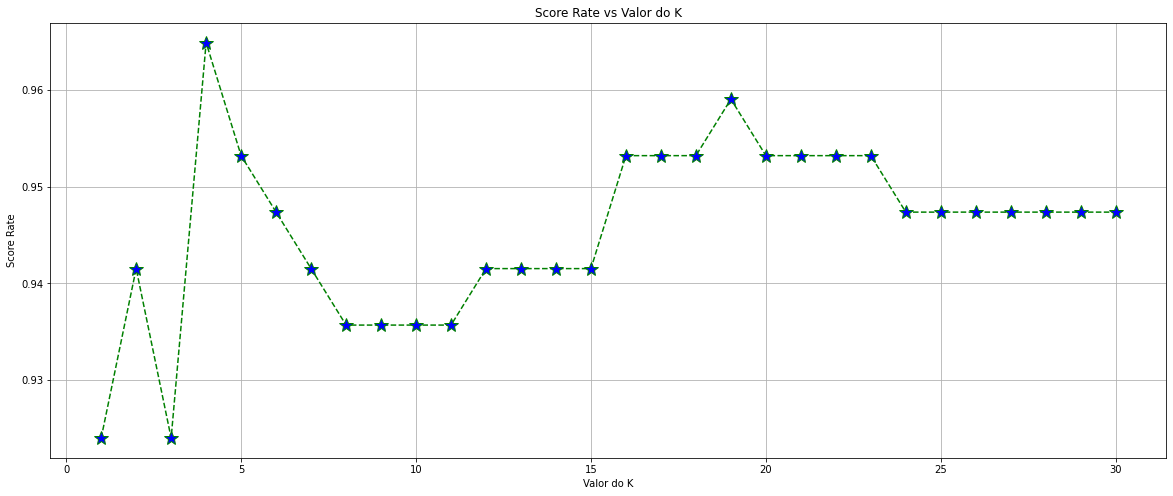

In [276]:
#Plotando um gráfico para a relação de Score Rate e Valor do K
plt.figure(figsize=(20,8))
plt.plot(range(inicio_k,fim_k,incremento), score, color='green', linestyle='dashed', marker='*', markerfacecolor = 'blue', markersize=15)
plt.title('Score Rate vs Valor do K')
plt.xlabel('Valor do K')
plt.ylabel('Score Rate') 
plt.grid()

In [277]:
#Criando uma instância do modelo KNN com n_neighbors igual a melhor_k
knn = KNeighborsClassifier(n_neighbors=melhor_k)

In [278]:
# Ajustando este modelo KNN aos dados de treinamento.
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=4)

In [279]:
#Executando o KNN com o conjunto de teste
Y_predict_test = knn.predict(X_test)
Y_predict_test

array(['Benigno', 'Benigno', 'Maligno', 'Benigno', 'Maligno', 'Maligno',
       'Benigno', 'Benigno', 'Benigno', 'Benigno', 'Benigno', 'Maligno',
       'Benigno', 'Benigno', 'Maligno', 'Maligno', 'Benigno', 'Benigno',
       'Benigno', 'Benigno', 'Benigno', 'Benigno', 'Benigno', 'Benigno',
       'Maligno', 'Benigno', 'Maligno', 'Benigno', 'Maligno', 'Benigno',
       'Benigno', 'Maligno', 'Benigno', 'Maligno', 'Benigno', 'Benigno',
       'Benigno', 'Benigno', 'Benigno', 'Benigno', 'Benigno', 'Benigno',
       'Benigno', 'Maligno', 'Benigno', 'Benigno', 'Benigno', 'Maligno',
       'Benigno', 'Benigno', 'Benigno', 'Maligno', 'Maligno', 'Benigno',
       'Benigno', 'Maligno', 'Benigno', 'Benigno', 'Maligno', 'Benigno',
       'Maligno', 'Maligno', 'Benigno', 'Benigno', 'Maligno', 'Maligno',
       'Benigno', 'Benigno', 'Benigno', 'Maligno', 'Benigno', 'Maligno',
       'Benigno', 'Maligno', 'Benigno', 'Benigno', 'Maligno', 'Benigno',
       'Benigno', 'Maligno', 'Benigno', 'Benigno', 

In [280]:
#Imprimindo uma Matriz de Confusão para Y_test(Resultado Real) e Y_predict_test
print (pd.crosstab(Y_test,Y_predict_test, rownames=['Real'], colnames=['           Predito'], margins=True))

           Predito  Benigno  Maligno  All
Real                                     
Benigno                 105        2  107
Maligno                   4       60   64
All                     109       62  171


In [281]:
#Importando metodo metrics da biblioteca sklearn 
#Imprimindo as Metricas de classificação para Y_test(Resultado Real) e Y_predict_test
from sklearn import metrics
print(metrics.classification_report(Y_test,Y_predict_test,target_names=cancer_mama['diagnosis'].unique()))

              precision    recall  f1-score   support

     Maligno       0.96      0.98      0.97       107
     Benigno       0.97      0.94      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

